# Customer Churn Prediction Using Logistic Regression
## Overview
This project aims to predict customer churn using a Logistic Regression model. 
We analyze customer behavior and demographics to determine whether a customer is likely to stop using the service.

The process includes:
- Data loading and cleaning
- Exploratory Data Analysis (EDA)
- Feature scaling
- Model training and evaluation


# Step 1: Installing the required packages 
In this project we've used the following packages
- Matplotlib
- Seaborn
- scikit-learn

In [1]:
!pip install matplotlib seaborn
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Step 2: Importing Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Step 2: Loading the Dataset 
Displayed the first 5 rows for viewer reference
Also, provided an quick overview of the dataset 

In [6]:
import pandas as pd
# Download dataset from working URL
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)
# Saved a copy to your local 'data' folder
df.to_csv("../data/Telco-Customer-Churn.csv", index=False)
#Display the first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Step 3: Data Cleaning

We handle missing values, drop irrelevant columns, and convert categorical variables to numerical using encoding techniques.


In [8]:
# Convert TotalCharges to numeric (coerce errors to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing TotalCharges with median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


## Step 4: Exploratory Data Analysis (EDA)

We explore the dataset using visualizations like histograms, boxplots, and correlation matrices to uncover patterns and relationships in the data.


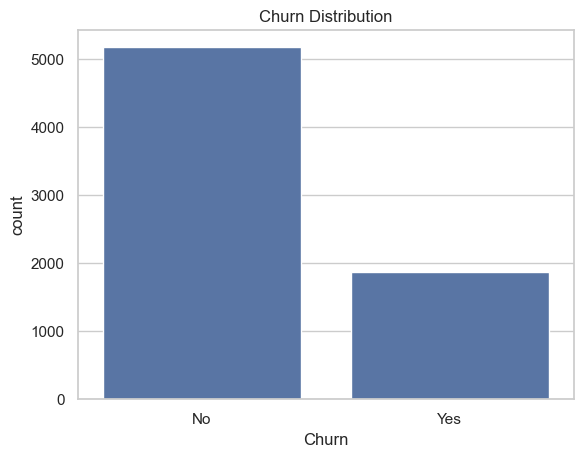

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns 
#set seaborn style
sns.set(style="whitegrid")
#plot count of churn 
sns.countplot(x='Churn',data=df)
plt.title("Churn Distribution")
plt.show()

In [ ]:
#Plot churn by contract type
plt.figure(figsize=(8,5))
sns.countplot(x='Contract',hue='Churn',data=df)
plt.title("Churn by Contract Type")
plt.show()

In [ ]:
#Churn by Monthly Charges 
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn',y='MonthlyCharges',data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

In [11]:
#PreProcessing ( Convert text to numbers )

from sklearn.preprocessing import LabelEncoder
#Create a copy of the dataset to work with 
data=df.copy()
#Drop the customerID column ( not useful for prediction)
data.drop('customerID',axis=1,inplace=True)
#Convert 'Yes/No' and 'Male/Female' to 0/1 using label Encoding
binary_cols=[col for col in data.columns if data[col].nunique()==2]
le=LabelEncoder()
for col in binary_cols:
    data[col]=le.fit_transform(data[col])
le.fit_transform(data[col])
#Use One-Hot encoding for other categorical features
data=pd.get_dummies(data)
#Confirming all columns are now numeric
data.dtypes.head()

gender           int64
SeniorCitizen    int64
Partner          int64
Dependents       int64
tenure           int64
dtype: object

## Step 5: Train-Test Split

We split the data into training and test sets (80/20) to train the model and evaluate its performance on unseen data.


In [12]:
from sklearn.model_selection import train_test_split
#Separate input features and target column
x=data.drop("Churn",axis=1)
x.head()
y=data["Churn"]
y.head()
#Split the data :80% training 20% testing
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
# View shape to understand the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5634, 40)
X_test shape: (1409, 40)
y_train shape: (5634,)
y_test shape: (1409,)


## Step 6: Feature Scaling

We use StandardScaler to normalize feature distributions. This is crucial for algorithms like Logistic Regression that are sensitive to feature scales.
## Step 7: Model Building - Logistic Regression

We train a Logistic Regression model using the training set. Logistic Regression is selected for its simplicity, interpretability, and solid performance on binary classification problems.


In [13]:
#Build a Logistic Regression Model 
from sklearn.preprocessing import StandardScaler

# Fit scaler on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Re-train the model on scaled data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

## Step 8: Model Evaluation

We evaluate the model using accuracy score, confusion matrix, and classification report. These metrics help us understand the model's performance on the test set.


In [14]:
#Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#predict on test set 
y_pred=model.predict(X_test_scaled)
#Evaluation
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))


Accuracy: 0.8197303051809794
Confusion Matrix:
 [[933 103]
 [151 222]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



## Conclusion

- Logistic Regression achieved 81.97% test accuracy, serving as a strong baseline.
- It was selected as the final model for its balance of performance and interpretability.
- Future improvements could include hyperparameter tuning or trying ensemble methods like XGBoost.

This project demonstrates a complete end-to-end machine learning workflow for churn prediction.
